## Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 4: Taking Advantage of Vectorization and Broadcasting (V&B) 

## Challenge 3: Deeply nested loops or shallow loopless codes?

When it comes to data manipulation using python a good rule of thumb is the less nested loop the better. Of course, this is just a rule of thumb and there are cases where having loops are unavoidable.

In this challenge, we will work on a big data manipulation task. I will give you a solution that has lots of nested loops and your job will be to transform the solution into one that only has the necessary loops. Let’s get started. 

In this challenge, we will be using the United States Presidential elections historical dataset. You may access the data from its source which is [MIT Election Data Science Lab accessible](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ). You may also download the file *countypres_2000-2020.csv* directly from the following link https://packt-data-prep-workshop.s3.eu-west-1.amazonaws.com/countypres_2000-2020.csv. 

 Answer the following quesitons or complete the following steps.
1.	The following code reads *countypres_2000-2020.csv* into the `election_df` pandas DataFrame. Run the following code and study the columns of `election_df`.


In [12]:
import pandas as pd
election_df = pd.read_csv('countypres_2000-2020.csv')
election_df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL


2.	The following code counts the number of unique counties in the US from `election_df`. Run the code to realize how many counties are in the US.

In [13]:
us_counties = (
    election_df.state_po +
    ' - ' +
    election_df.county_name
).unique()
print(us_counties)
print(len(us_counties))

['AL - AUTAUGA' 'AL - BALDWIN' 'AL - BARBOUR' ... 'VA - WAYNESBORO CITY'
 'VA - WILLIAMSBURG CITY' 'VA - WINCHESTER CITY']
3193


3.	The following code filters `election_df` to isolate the data of Yuma county in Arizona. Run the code and study its printout. Specifically, pay attention to the columns `party` and `mode`.

In [14]:
yuma_df = (election_df
 .query('state_po == "AZ"')
 .query('county_name == "YUMA"')
)
yuma_df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
324,2000,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,AL GORE,DEMOCRAT,12055,28652,20220315,TOTAL
325,2000,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,15708,28652,20220315,TOTAL
326,2000,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,RALPH NADER,GREEN,495,28652,20220315,TOTAL
327,2000,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,OTHER,OTHER,394,28652,20220315,TOTAL
12707,2004,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,JOHN KERRY,DEMOCRAT,16032,38465,20220315,TOTAL
12708,2004,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,22184,38465,20220315,TOTAL
12709,2004,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,OTHER,OTHER,249,38465,20220315,TOTAL
22058,2008,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,BARACK OBAMA,DEMOCRAT,18559,43615,20220315,TOTAL
22059,2008,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,24577,43615,20220315,TOTAL
22060,2008,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,OTHER,OTHER,479,43615,20220315,TOTAL


4.	The following code only keeps the rows where the value of party is either **DEMOCRAT** or **REPUBLICAN**.  Study the code and its printout.

In [16]:
BM = yuma_df['party'].isin(['DEMOCRAT','REPUBLICAN'])
yuma_df = (
    yuma_df[BM]
    .copy()
)
yuma_df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
324,2000,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,AL GORE,DEMOCRAT,12055,28652,20220315,TOTAL
325,2000,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,15708,28652,20220315,TOTAL
12707,2004,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,JOHN KERRY,DEMOCRAT,16032,38465,20220315,TOTAL
12708,2004,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,22184,38465,20220315,TOTAL
22058,2008,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,BARACK OBAMA,DEMOCRAT,18559,43615,20220315,TOTAL
22059,2008,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,24577,43615,20220315,TOTAL
31409,2012,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,BARACK OBAMA,DEMOCRAT,18059,41953,20220315,TOTAL
31410,2012,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,MITT ROMNEY,REPUBLICAN,23352,41953,20220315,TOTAL
40760,2016,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,24605,53010,20220315,TOTAL
40761,2016,ARIZONA,AZ,YUMA,4027.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,25165,53010,20220315,TOTAL


5.	The following code uses `.groupby()` function to make sure that all of the different modes of elections have been summed up for every election and every party in each county. Run the code and study the reduced version of `yuma_df`. 



In [17]:
yuma_df = (
    yuma_df
    .groupby(
        ['year','state_po','county_name','party']
    ).candidatevotes
    .sum()
    .reset_index()
)
print(yuma_df)

    year state_po county_name       party  candidatevotes
0   2000       AZ        YUMA    DEMOCRAT           12055
1   2000       AZ        YUMA  REPUBLICAN           15708
2   2004       AZ        YUMA    DEMOCRAT           16032
3   2004       AZ        YUMA  REPUBLICAN           22184
4   2008       AZ        YUMA    DEMOCRAT           18559
5   2008       AZ        YUMA  REPUBLICAN           24577
6   2012       AZ        YUMA    DEMOCRAT           18059
7   2012       AZ        YUMA  REPUBLICAN           23352
8   2016       AZ        YUMA    DEMOCRAT           24605
9   2016       AZ        YUMA  REPUBLICAN           25165
10  2020       AZ        YUMA    DEMOCRAT           32210
11  2020       AZ        YUMA  REPUBLICAN           36534


6.	The following code first calculates the total number of votes in Yuma county in every election year and then uses it to calculate `percentvotes` for every party in every election year. Study the code, run it, and study its printouts. 

In [18]:
total_df = yuma_df.groupby('year').candidatevotes.sum()
print(total_df)
yuma_df['percentvotes'] = None
for i, row in yuma_df.iterrows():
    yuma_df.at[i, 'percentvotes'] = (
        row.candidatevotes / total_df.loc[row.year]
    )
yuma_df

year
2000    27763
2004    38216
2008    43136
2012    41411
2016    49770
2020    68744
Name: candidatevotes, dtype: int64


,year,state_po,county_name,party,candidatevotes,percentvotes
0,2000,AZ,YUMA,DEMOCRAT,12055,0.434211
1,2000,AZ,YUMA,REPUBLICAN,15708,0.565789
2,2004,AZ,YUMA,DEMOCRAT,16032,0.41951
3,2004,AZ,YUMA,REPUBLICAN,22184,0.58049
4,2008,AZ,YUMA,DEMOCRAT,18559,0.430244
5,2008,AZ,YUMA,REPUBLICAN,24577,0.569756
6,2012,AZ,YUMA,DEMOCRAT,18059,0.436092
7,2012,AZ,YUMA,REPUBLICAN,23352,0.563908
8,2016,AZ,YUMA,DEMOCRAT,24605,0.494374
9,2016,AZ,YUMA,REPUBLICAN,25165,0.505626


7.	The following code creates two line plots that show **DEMOCRAT** and **REPUBLICAN** trends of the two parties in the past 6 US presidential elections. Run the code and study the line plots. 

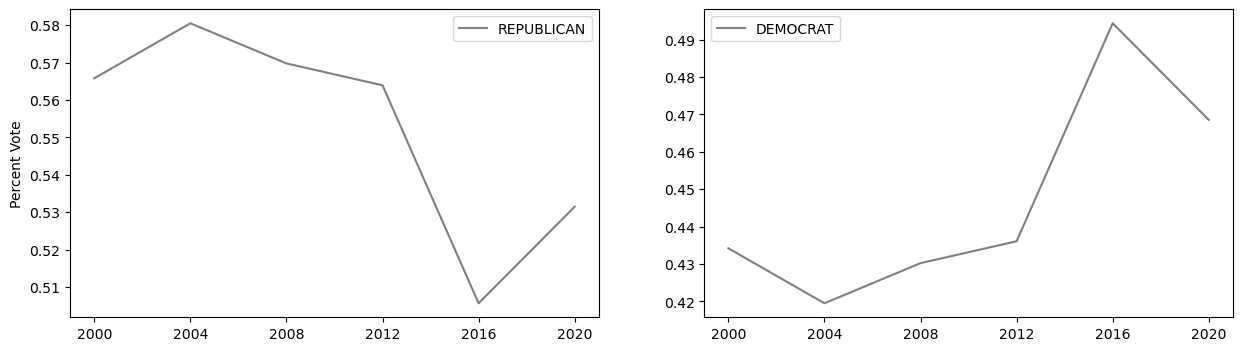

In [19]:
import matplotlib.pyplot as plt
import numpy as np
rep_BM = yuma_df.party == 'REPUBLICAN'
dem_BM = yuma_df.party == 'DEMOCRAT'
rep_sr = yuma_df[rep_BM].reset_index()
dem_sr = yuma_df[dem_BM].reset_index()
x = np.arange(6)
f,axes = plt.subplots(1,2,figsize=(15,4))
rep_sr.percentvotes.plot(ax = axes[0], label='REPUBLICAN',c='gray')
axes[0].set_ylabel('Percent Vote')
axes[0].set_xticks(x)
axes[0].set_xticklabels([2000,2004,2008,2012,2016,2020])
axes[0].legend()
dem_sr.percentvotes.plot(ax = axes[1], label='DEMOCRAT',c='gray')
axes[1].set_xticks(x)
axes[1].set_xticklabels([2000,2004,2008,2012,2016,2020])
axes[1].legend()
plt.legend()
plt.show()

8.	Describe the trend that you see in the two line plots that you created in Step 7. 

**Answer**: The Republicans used to be the easy majority in Yuma county in the earlier elections, however, its majority has dwindled in the past 6 elections despite keeping the majority. We see the opposite story for Democrats in Yuma county.

9.	The following code recreates the preceding figure some addition. The code fits two linear lines to the line plots and draws them on top of the plots. Moreover, it also adds the regression equation of the fitted lines to the plots. Study and run the following code, and then study the code’s output. Study the code and the visualization it creates. 

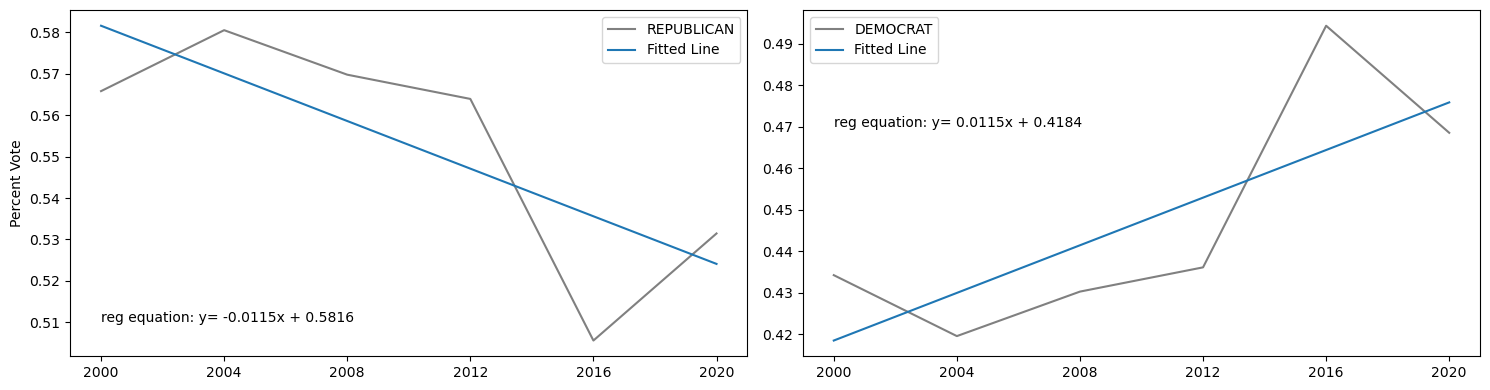

In [20]:
from scipy.optimize import curve_fit
def linear_function(x,a,b):
    return a*x+b
x = np.arange(6)
f,axes = plt.subplots(1,2,figsize=(15,4))
rep_sr.percentvotes.plot(ax = axes[0], label='REPUBLICAN',c='gray')
p,_ = curve_fit(linear_function,x,rep_sr.percentvotes.values)
axes[0].plot(x,linear_function(x,p[0],p[1]),label='Fitted Line')
axes[0].annotate(xy=(0,0.51),
                text = f'reg equation: y= {p[0]:.4f}x + {p[1]:.4f}')
axes[0].set_ylabel('Percent Vote')
axes[0].set_xticks(x)
axes[0].set_xticklabels([2000,2004,2008,2012,2016,2020])
axes[0].legend()
dem_sr.percentvotes.plot(ax = axes[1], label='DEMOCRAT',c='gray')
p,_ = curve_fit(linear_function,x,dem_sr.percentvotes.values)
axes[1].plot(x,linear_function(x,p[0],p[1]),label='Fitted Line')
axes[1].annotate(xy=(0,0.47),
                text = f'reg equation: y= {p[0]:.4f}x + {p[1]:.4f}')
axes[1].set_xticks(x)
axes[1].set_xticklabels([2000,2004,2008,2012,2016,2020])
axes[1].legend()
plt.legend()
plt.tight_layout()
plt.savefig('images/challenge3_8.png',dpi=500)

10.	Each line has two parameters, an intercept, and a slope. For instance, the slope of the line that fits the republication vote percent in yuma_df is **-0.0115** and the intercept of the same line is **0.5816**.  With these two parameters, you can redraw the line. Compare the slope and intercept of the two lines shown in the preceding figure. What can we learn?

**Answer**: The slope and intercept of each fitted line captures the story that the 6 values tell for each party in Yuma County. For instance, we see a positive slope for DEMOCRAT as their vote had increased steadily from the election 2000 to 2020, and we see a negative slope for REPUBLICAN as their vote gradually decreased.

11.	So far in this challenge, we were getting to know `election_df` and the four parameters we want to extract for each US county.  These four parameters are listed as follows.

- **Slope DEMOCRAT**: The slope of a line that fits the trend of DEMOCRAT from percentvotes 2000 to 2020.
- **Intercept DEMOCRAT**: The intercept of a line that fits the trend of DEMOCRAT from percentvotes 2000 to 2020.
- **Slope REPUBLICAN**: The slope of a line that fits the trend of REPUBLICAN from percentvotes 2000 to 2020.
- **Intercept REPUBLICAN**: The intercept of a line that fits the trend of REPUBLICAN from percentvotes 2000 to 2020.

 In this challenge, the task is to capture these parameters for each county in the best possible way we can. 
The following code creates `param_df` which is a placeholder we will use to insert the value of the parameters we calculate during the data manipulation task in the next step. 

In [21]:
BM = election_df.party.isin(['DEMOCRAT','REPUBLICAN'])

param_df = pd.DataFrame(
    election_df[['state_po','county_name','party']][BM].copy()
    .drop_duplicates()
    .reset_index(drop=True)

    .assign(slope=None)
    .assign(intercept=None)
    .set_index(['state_po','county_name','party'])
    .unstack()
)
print(param_df)

                        slope            intercept           
party                DEMOCRAT REPUBLICAN  DEMOCRAT REPUBLICAN
state_po county_name                                         
AK       DISTRICT 1      None       None      None       None
         DISTRICT 10     None       None      None       None
         DISTRICT 11     None       None      None       None
         DISTRICT 12     None       None      None       None
         DISTRICT 13     None       None      None       None
...                       ...        ...       ...        ...
WY       SWEETWATER      None       None      None       None
         TETON           None       None      None       None
         UINTA           None       None      None       None
         WASHAKIE        None       None      None       None
         WESTON          None       None      None       None

[3193 rows x 4 columns]


12.	The following code uses three-level nested loops to fill `param_df` and captures the four parameters for each county in the US. Study the code, and describe how the code gets the task done.

```
parties = ['DEMOCRAT','REPUBLICAN']

for state, county in param_df.index:
    BM = election_df.state_po == state
    BM = BM & (election_df.county_name ==county)
    
    county_df = (
        election_df[BM]
        .groupby(['year','party'])
        .candidatevotes
        .sum()
        .reset_index()
    )
    
    total_df = (
        county_df
        .groupby('year')
        .candidatevotes
        .sum()
    )
    
    if len(total_df)<2 or total_df.sum()==0:
        continue
    
    for party in parties:
        BM = county_df.party == party
        party_df = county_df[BM].copy()
        
        if party_df.empty:
            continue
            
        party_df['percentvotes'] = None
        
        for i, row in party_df.iterrows():
            party_df.at[i, 'percentvotes'] = (
                row.candidatevotes / total_df.loc[row.year]
            )
            
        
        
        party_df.percentvotes = (
            party_df.percentvotes.fillna(
                party_df.percentvotes.median()
            )
        )
        
        p,_ = curve_fit(linear_function,
                        np.arange(len(party_df)),
                        party_df.percentvotes.values)
        
        param_df.loc[(state,county),('slope',party)] = p[0]
        param_df.loc[(state,county),('intercept',party)] = p[1]
```

**Answer**: The code has three-level nested loops. The first level for the loop goes over each county in election_df. During each iteration, it filters out the data of one county. 

The second level loop goes over the two DEMOCRAT and REPUBLICAN parties. During each iteration, it calculates the `percentvotes` and also calculates the parameters of the fitted line to the party's vote trends. At the end of the loop the calcualted paramters are placed in `param_df`.

The third level loop is used to calculate `percentvotes`.




13.	Run the code in the previous step, and time how long it takes to complete. Please pay attention that the code throws out some warnings that you can just ignore.

In [22]:
%%time
parties = ['DEMOCRAT','REPUBLICAN']

for state, county in param_df.index:
    BM = election_df.state_po == state
    BM = BM & (election_df.county_name ==county)
    
    county_df = (
        election_df[BM]
        .groupby(['year','party'])
        .candidatevotes
        .sum()
        .reset_index()
    )
    
    total_df = (
        county_df
        .groupby('year')
        .candidatevotes
        .sum()
    )
    
    if len(total_df)<2 or total_df.sum()==0:
        continue
    
    for party in parties:
        BM = county_df.party == party
        party_df = county_df[BM].copy()
        
        if party_df.empty:
            continue
            
        party_df['percentvotes'] = None
        
        for i, row in party_df.iterrows():
            party_df.at[i, 'percentvotes'] = (
                row.candidatevotes / total_df.loc[row.year]
            )
            
        
        
        party_df.percentvotes = (
            party_df.percentvotes.fillna(
                party_df.percentvotes.median()
            )
        )
        
        p,_ = curve_fit(linear_function,
                        np.arange(len(party_df)),
                        party_df.percentvotes.values)
        
        param_df.loc[
            (state,county),('slope',party)
        ] = p[0]
        param_df.loc[
            (state,county),('intercept',party)
        ] = p[1]

<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
<timed exec>:36: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\roy_jafari\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be

Wall time: 1min 13s


In [23]:
param_df

slope            intercept           
party                 DEMOCRAT REPUBLICAN  DEMOCRAT REPUBLICAN
state_po county_name                                          
AK       DISTRICT 1   0.038418  -0.037873  0.233395   0.699121
         DISTRICT 10 -0.017341   0.021503  0.310962    0.61846
         DISTRICT 11 -0.001146   0.007919  0.256032   0.663277
         DISTRICT 12 -0.006977   0.012632  0.278512   0.647397
         DISTRICT 13  0.003017   0.006932   0.31033   0.590013
...                        ...        ...       ...        ...
WY       SWEETWATER  -0.030532   0.025256  0.362055    0.60171
         TETON        0.042895  -0.043251  0.443231   0.503325
         UINTA       -0.017252   0.008237   0.24697   0.724088
         WASHAKIE    -0.012725   0.004297  0.225679   0.756872
         WESTON      -0.015821   0.013587  0.176554   0.794524

[3193 rows x 4 columns]

14.	Your challenge is to redo what the code in Step 11 does, but use as few loos as possible. Challenge yourself, and see if you can do it with no loops. Hint: in my solution with a few loops (perhaps none), I ended up using the following functions: pandas DataFrame `.groupby()`, `.merge()`, `.unstack()`, and `.apply()` functions. You won’t have to use these, whatever you can make it work is great. 

**Answer**: We will first do it step by step then, I will put all the code together and time them to compare with the nest loop approach.

In the first step, we will use `.groupby()` to calculate total_df which has the total_df for all elections and counties.

In [31]:
election_df = pd.read_csv('countypres_2000-2020.csv')
total_df = ( 
    election_df
    .groupby(['year','state_po','county_name'])
    .candidatevotes
    .sum()
    .rename('totalvotes')
    .reset_index()
)
total_df

,year,state_po,county_name,totalvotes
0,2000,AK,DISTRICT 1,6656
1,2000,AK,DISTRICT 10,8884
2,2000,AK,DISTRICT 11,6980
3,2000,AK,DISTRICT 12,7601
4,2000,AK,DISTRICT 13,7943
...,...,...,...,...
18914,2020,WY,SWEETWATER,16698
18915,2020,WY,TETON,14787
18916,2020,WY,UINTA,9459
18917,2020,WY,WASHAKIE,4032


In the second step, we will use `.groupby()` to reduce the data into the aggregation level that we need, we call the reduced data `party_df`.

In [32]:
BM = election_df.party.isin(['DEMOCRAT','REPUBLICAN'])
party_df = (
    election_df[BM]
    .groupby(['year','state_po','county_name','party'])
    .candidatevotes
    .sum()
    .reset_index()
)
party_df

,year,state_po,county_name,party,candidatevotes
0,2000,AK,DISTRICT 1,DEMOCRAT,1284
1,2000,AK,DISTRICT 1,REPUBLICAN,4681
2,2000,AK,DISTRICT 10,DEMOCRAT,2194
3,2000,AK,DISTRICT 10,REPUBLICAN,5673
4,2000,AK,DISTRICT 11,DEMOCRAT,2043
...,...,...,...,...,...
37833,2020,WY,UINTA,REPUBLICAN,7496
37834,2020,WY,WASHAKIE,DEMOCRAT,651
37835,2020,WY,WASHAKIE,REPUBLICAN,3245
37836,2020,WY,WESTON,DEMOCRAT,360


In the third step, we use the `.merge()` function to add the `totalvotes` column from `total_df` to `party_df`. 

In [33]:
party_df = party_df.merge(
    total_df,
    on=['year','state_po','county_name']
)
party_df

,year,state_po,county_name,party,candidatevotes,totalvotes
0,2000,AK,DISTRICT 1,DEMOCRAT,1284,6656
1,2000,AK,DISTRICT 1,REPUBLICAN,4681,6656
2,2000,AK,DISTRICT 10,DEMOCRAT,2194,8884
3,2000,AK,DISTRICT 10,REPUBLICAN,5673,8884
4,2000,AK,DISTRICT 11,DEMOCRAT,2043,6980
...,...,...,...,...,...,...
37833,2020,WY,UINTA,REPUBLICAN,7496,9459
37834,2020,WY,WASHAKIE,DEMOCRAT,651,4032
37835,2020,WY,WASHAKIE,REPUBLICAN,3245,4032
37836,2020,WY,WESTON,DEMOCRAT,360,3560


The fourth step is self explanatory.

In [34]:
party_df['percentvotes'] = party_df.candidatevotes  / party_df.totalvotes
party_df

,year,state_po,county_name,party,candidatevotes,totalvotes,percentvotes
0,2000,AK,DISTRICT 1,DEMOCRAT,1284,6656,0.192909
1,2000,AK,DISTRICT 1,REPUBLICAN,4681,6656,0.703275
2,2000,AK,DISTRICT 10,DEMOCRAT,2194,8884,0.246961
3,2000,AK,DISTRICT 10,REPUBLICAN,5673,8884,0.638564
4,2000,AK,DISTRICT 11,DEMOCRAT,2043,6980,0.292693
...,...,...,...,...,...,...,...
37833,2020,WY,UINTA,REPUBLICAN,7496,9459,0.792473
37834,2020,WY,WASHAKIE,DEMOCRAT,651,4032,0.161458
37835,2020,WY,WASHAKIE,REPUBLICAN,3245,4032,0.804812
37836,2020,WY,WESTON,DEMOCRAT,360,3560,0.101124


In the fifth step, we will use the function `.unstack()` to restructure the dataframe and make it ready to use the .apply() function.

In [35]:
party_df = (
    party_df
    .set_index(['state_po','county_name','party','year'])
    .percentvotes
    .unstack()
)
party_df

year                                 2000      2004      2008      2012  \
state_po county_name party                                                
AK       DISTRICT 1  DEMOCRAT    0.192909  0.351541  0.372597  0.196581   
                     REPUBLICAN  0.703275  0.605069  0.595265  0.763921   
         DISTRICT 10 DEMOCRAT    0.246961  0.341395  0.369368  0.204566   
                     REPUBLICAN  0.638564  0.627442  0.604096  0.750076   
         DISTRICT 11 DEMOCRAT    0.292693  0.258273  0.195013  0.257444   
...                                   ...       ...       ...       ...   
WY       UINTA       REPUBLICAN  0.737261  0.752506  0.684604  0.774681   
         WASHAKIE    DEMOCRAT    0.198963  0.207827  0.254146  0.201318   
                     REPUBLICAN  0.774624  0.777832  0.720976  0.764199   
         WESTON      DEMOCRAT    0.146732  0.170991  0.192736  0.125633   
                     REPUBLICAN  0.823856  0.807488  0.766842  0.839833   

year                                 2016      2020  
state_po county_name party                           
AK       DISTRICT 1  DEMOCRAT    0.387617  0.475390  
                     REPUBLICAN  0.479060  0.480038  
         DISTRICT 10 DEMOCRAT    0.200000  0.243373  
                     REPUBLICAN  0.691925  0.721196  
         DISTRICT 11 DEMOCRAT    0.221075  0.294505  
...                                   ...       ...  
WY       UINTA       REPUBLICAN  0.726564  0.792473  
         WASHAKIE    DEMOCRAT    0.139486  0.161458  
                     REPUBLICAN  0.763241  0.804812  
         WESTON      DEMOCRAT    0.084799  0.101124  
                     REPUBLICAN  0.860182  0.872753  

[6386 rows x 6 columns]

Lastly, we create `fit_linear()` function to apply to each row of restructured `party_df`.

In [36]:
def fit_linear(r):
    p,_ = curve_fit(linear_function,
                    np.arange(len(r)),
                    r.fillna(r.median()).values)
    return p

param_df = party_df.apply(fit_linear,axis=1)
print(param_df)

C:\Users\roy_jafari\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


state_po  county_name  party     
AK        DISTRICT 1   DEMOCRAT       [0.038417640170529066, 0.23339487630531275]
                       REPUBLICAN      [-0.037872999644323446, 0.699120633423823]
          DISTRICT 10  DEMOCRAT       [-0.017340693538793195, 0.3109623415449043]
                       REPUBLICAN       [0.02150256030257236, 0.6184600189753928]
          DISTRICT 11  DEMOCRAT      [-0.0011457726579036356, 0.2560317255201247]
                                                         ...                     
WY        UINTA        REPUBLICAN      [0.008237490213118703, 0.7240877765008433]
          WASHAKIE     DEMOCRAT       [-0.01272499420117712, 0.22567905023352208]
                       REPUBLICAN       [0.00429684740126246, 0.7568715375669055]
          WESTON       DEMOCRAT      [-0.015820602867461453, 0.17655371531465858]
                       REPUBLICAN      [0.013587250656433403, 0.7945242786505198]
Length: 6386, dtype: object


15.	Compare the runtime performance of the solution with multiple loops and the one you created that had fewer loops (ideally none). Which one ends faster? What are your conclusions?

**Answer**: Putting everything together from the previous step and we can see how long the code it takes to run.

In [30]:
%%time
election_df = pd.read_csv('countypres_2000-2020.csv')
total_df = ( 
    election_df
    .groupby(['year','state_po','county_name'])
    .candidatevotes
    .sum()
    .rename('totalvotes')
    .reset_index()
)

BM = election_df.party.isin(['DEMOCRAT','REPUBLICAN'])
party_df = (
    election_df[BM]
    .groupby(['year','state_po','county_name','party'])
    .candidatevotes
    .sum()
    .reset_index()
)

party_df = party_df.merge(
    total_df,
    on=['year','state_po','county_name']
)

party_df['percentvotes'] = party_df.candidatevotes  / party_df.totalvotes

party_df = (
    party_df
    .set_index(['state_po','county_name','party','year'])
    .percentvotes
    .unstack()
)

param_df = party_df.apply(fit_linear,axis=1)

C:\Users\roy_jafari\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Wall time: 3.61 s


The solution with no loops was about 20 times faster. 